In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hydro import objective_fxns as ofx
from rhessys import utilities as ut
%matplotlib inline

In [2]:
SWE = pd.read_pickle('../greenness_timing/data/niwot_snotel.pcl') # load SWE
SWE.swe *= 25.4 # convert inches to mm
SWE['wateryear']=SWE.index.map(ut.wateryear)
SWE = SWE.loc[(SWE.wateryear>=2004) & (SWE.wateryear<=2010),:]

In [3]:
obs = pd.read_csv('/RHESSys/Comocreek/barnhatb/obs/como_discharge_real_clean.csv', sep=',', header='infer') # load obs
obs.index = pd.date_range(start='2004-01-01',freq='D', periods = len(obs.q_liter_per_day))
obs = obs.drop(['year','doy'], axis = 1)
area = 5000000 # m^2
streamflow = obs.q_liter_per_day
streamflow = streamflow*0.001 # convert to m3/d
streamflow = streamflow/area # covert to m/d
obs['discharge'] = streamflow*1000 # convert to mm/d
del streamflow

In [4]:
obs['wateryear'] = obs.index.map(ut.wateryear)
obs2 = obs.groupby(by='wateryear').sum() # generate yearly sums
obstrain = obs2.loc[(obs2.index>=2004) & (obs2.index<=2010),'discharge'] # pull out the training years of observations
obs = obs.loc[(obs.wateryear>=2004)&(obs.wateryear<=2010),:]

In [38]:
fl = '/RHESSys/ComoCreek_new/out/cal/cal_3_5179_basin.daily'
#fl = '/RHESSys/ComoCreek_new/out/test_snow2_basin.daily'
data = ut.readRHESSysBasin(fl)
data['wateryear'] = data.index.map(ut.wateryear)
data = data.loc[(data.wateryear>=2004)&(data.wateryear<=2010),:]
data2 = data.groupby(by='wateryear').sum()

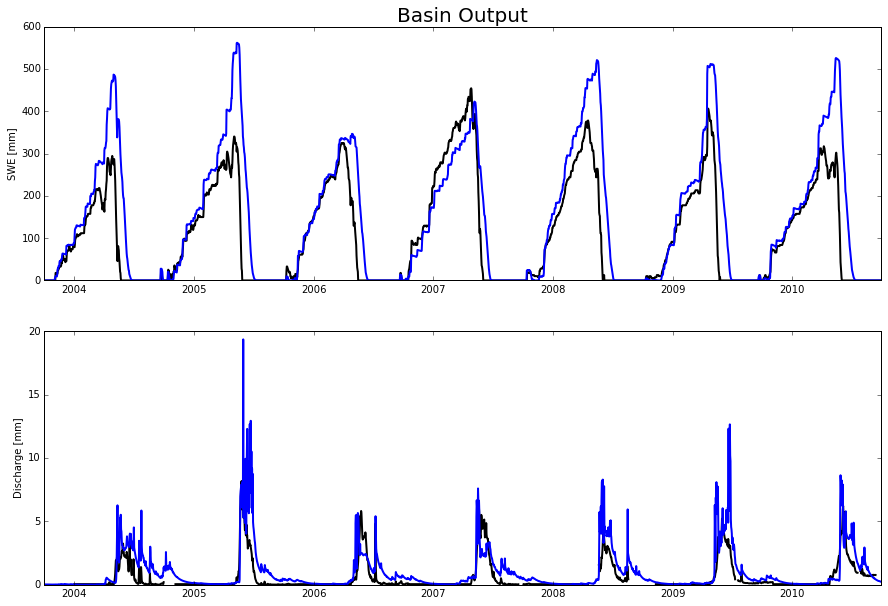

In [39]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(211)

ax1.plot(SWE.index,SWE.swe,'-k',lw=2)
ax1.plot(data.index,data.snowpack,'-b',lw=2)
ax1.set_ylabel('SWE [mm]')
ax1.set_title('Basin Output', fontsize=20)

ax2 = fig.add_subplot(212)
ax2.plot(obs.index,obs.discharge,'-k',lw=2)
ax2.plot(data.index,data.streamflow,'-b',lw=2)
ax2.set_ylabel('Discharge [mm]')

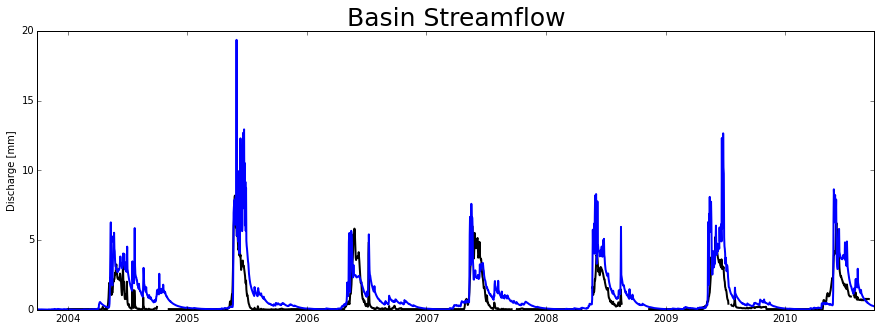

In [40]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(111)

ax1.plot(obs.index,obs.discharge,'-k',lw=2)
ax1.plot(data.index,data.streamflow,'-b',lw=2)
ax1.set_ylabel('Discharge [mm]')
ax1.set_title('Basin Streamflow',fontsize=25)
plt.savefig('/RHESSys/ComoCreek_new/figures/better_water.png',dpi=300,bbox_inches='tight')

In [31]:
ofx.nashsut(obs.discharge,data.streamflow)

-0.13774759956588523

In [32]:
parampth = '/RHESSys/ComoCreek_new/scripts/cal_3'

gw1 = np.loadtxt(parampth+'_gw1.txt')
gw2 = np.loadtxt(parampth+'_gw2.txt')
m = np.loadtxt(parampth+'_m.txt')
ksat = np.loadtxt(parampth+'_ksat.txt')
tlapse = np.loadtxt(parampth+'_tlapse.txt')
plapse = np.loadtxt(parampth+'_plapse.txt')

In [33]:
idx = 5179

In [34]:
print 'gw1:',gw1[idx]
print 'gw2:',gw2[idx]
print 'm:',m[idx]
print 'ksat:',ksat[idx]
print 'tlapse:',tlapse[idx]
print 'plapse:',plapse[idx]

gw1: 0.242
gw2: 0.488
m: 0.168
ksat: 46.828
tlapse: 0.003
plapse: 0.0017


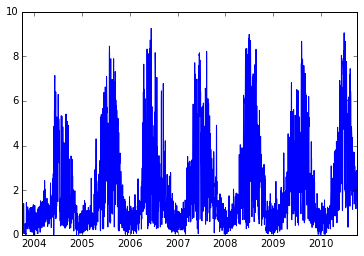

In [42]:
plt.plot(data.index,data.evap+data.trans)

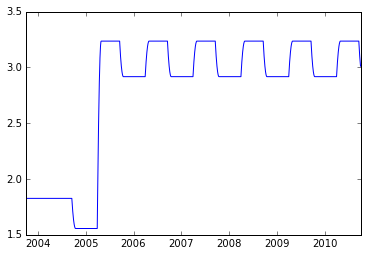

In [43]:
plt.plot(data.index,data.lai)

In [23]:
len(data.loc['2004-1-1':])

2465

In [24]:
len(obs.loc['2004-1-1':])

2465

In [18]:
data.tail()

,basinID,pot_surface_infil,snow_thr,sat_def_z,sat_def,rz_storage,unsat_stor,rz_drainage,unsat_drain,cap,...,Lstar_snow,LE_canopy,LE_soil,LE_snow,Lstar_strat,canopydrip,ga,wateryear,accumPrecip,accumSnowFall
2010-09-26,1,0,0,1877.649670,816.777607,156.630368,61.436067,0.005756,0.000523,0.132245,...,0,7287.484017,491.071811,0,0,0,130.094107,2010,1276.490169,914.338955
2010-09-27,1,0,0,1884.925076,819.942408,156.842069,61.435798,0.002287,0.000293,0.129170,...,0,6714.596336,339.905064,0,0,0,130.096572,2010,1276.490169,914.338955
2010-09-28,1,0,0,1893.168376,823.528243,157.073979,61.435697,0.001952,0.000108,0.147549,...,0,7720.188471,371.135386,0,0,0,130.098907,2010,1276.490169,914.338955
2010-09-29,1,0,0,1899.737428,826.385781,157.262234,61.435599,0.001209,0.000098,0.101927,...,0,6066.544246,290.006317,0,0,0,130.101113,2010,1276.490169,914.338955
2010-09-30,1,0,0,1904.530659,828.470837,157.380797,61.435550,0.003475,0.000089,0.093816,...,0,4323.917866,231.678664,0,0,0,130.103189,2010,1276.490169,914.338955


In [19]:
obs.tail()

,q_liter_per_day,Unnamed: 3,discharge,wateryear
2010-09-26,NaN,NaN,NaN,2010
2010-09-27,NaN,NaN,NaN,2010
2010-09-28,NaN,NaN,NaN,2010
2010-09-29,NaN,NaN,NaN,2010
2010-09-30,NaN,NaN,NaN,2010


In [15]:
len(obs)

2465

# Now look at patch output

In [20]:
fl = '/RHESSys/ComoCreek_new/out/cal_3_5999_patch.daily'
ptch = pd.read_table(fl,delim_whitespace=True,header='infer', parse_dates={'foo':[2,1,0]}, index_col='foo')
ptch['wateryear'] = ptch.index.map(wateryear)
ptch = ptch.loc[(ptch.wateryear>=2005)&(ptch.wateryear<=2012),:]

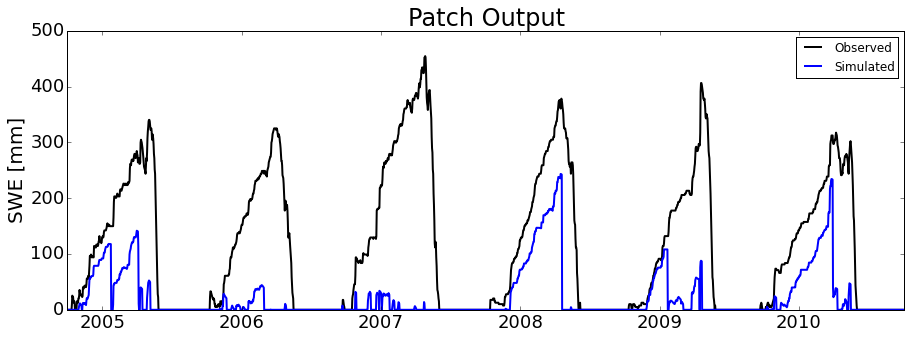

In [26]:
fig = plt.figure(figsize=(15,5))
plt.title('Patch Output', fontsize=24)
ax1 = fig.add_subplot(111)
ax1.plot(SWE.index,SWE.swe,'-k',lw=2)
ax1.plot(ptch.index,ptch.snow,'-b',lw=2)
ax1.set_ylabel('SWE [mm]', fontsize = 20)
plt.setp(ax1.get_xticklabels(), fontsize=18);
plt.setp(ax1.get_yticklabels(), fontsize=18);
plt.legend(['Observed','Simulated'],loc='best')
plt.savefig('./figures/snow_patch_example.png', bbox_inches='tight', dpi=300)

## Now look at the annual water balance

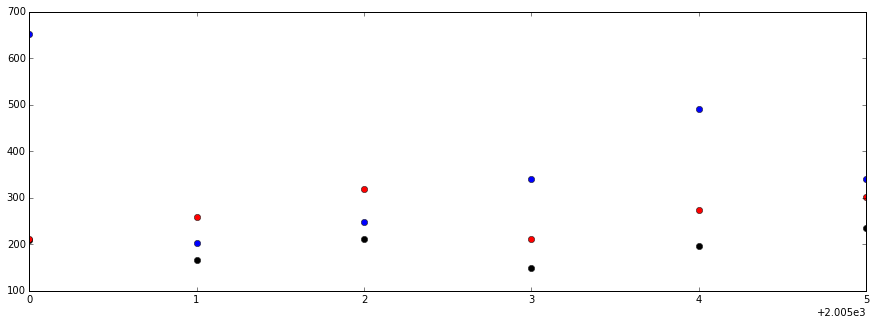

In [14]:
plt.figure(figsize=(15,5))
plt.plot(obstrain.index,obstrain,'ok')
plt.plot(data2.index,data2.streamflow,'ob')
plt.plot(data4.index,data4.streamflow,'or')

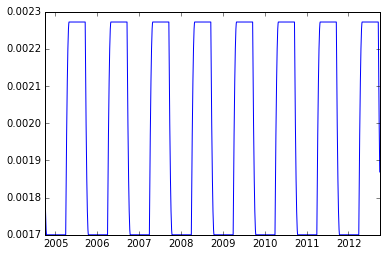

In [55]:
plt.plot(ptch.index,ptch.lai)
plt.plot(ptch.index,ptch.lai)

In [60]:
data.lai.max()

1.5375290000000001

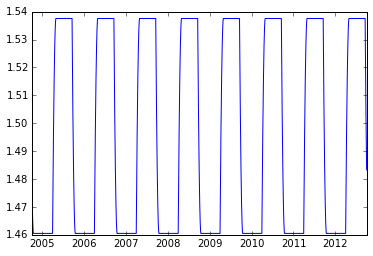

In [59]:
plt.plot(data.index,data.lai)

In [57]:
plt.plot(ptch.index,ptch.tra)

AttributeError: 'DataFrame' object has no attribute 'trans'

In [58]:
ptch.head()

,basinID,hillID,zoneID,patchID,rain_thr,detention_store,sat_def_z,sat_def,rz_storage,potential_rz_store,...,exfil_unsat,snow_Rnet,snow_QLE,snow_QH,snow_Qrain,snow_Qmelt,LEcanopy,SED,snow_age,wateryear
foo,,,,,,,,,,,,,,,,,,,,,
2004-10-01,1,29,4582,4582,7.619412,0,1260.778807,548.438781,1.440951,2.523631,...,0.000001,0.888144,0,0,18.235688,0.888144,1.517728,0.001,0,2005
2004-10-02,1,29,4582,4582,0.000000,0,1257.550686,547.034548,1.286679,2.523631,...,0.000152,0.000000,0,0,0.000000,0.000000,6.163527,0.001,0,2005
2004-10-03,1,29,4582,4582,0.000000,0,1255.143255,545.987316,1.268527,2.523631,...,0.000170,0.000000,0,0,0.000000,0.000000,7.011591,0.001,0,2005
2004-10-04,1,29,4582,4582,0.000000,0,1256.196386,546.445428,1.267161,2.523631,...,0.000171,0.000000,0,0,0.000000,0.000000,6.669934,0.001,0,2005
2004-10-05,1,29,4582,4582,2.539429,0,1258.702076,547.535403,1.440951,2.523631,...,0.000005,0.000000,0,0,0.000000,0.000000,1.419802,0.001,0,2005
